In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Analysis Functions

In [5]:
def analyze_cue_time_diff(df):
    df['mix_cue_time_diff'] = df['mix_cue_out_time'] - df['mix_cue_in_time']
    df['track_cue_time_diff'] = df['track_cue_out_time'] - df['track_cue_in_time']
    df['cue_time_diff_diff'] = df['mix_cue_time_diff'] - df['track_cue_time_diff']

    df['mix_cue_beat_diff'] = df['mix_cue_out_beat'] - df['mix_cue_in_beat']
    df['track_cue_beat_diff'] = df['track_cue_out_beat'] - df['track_cue_in_beat']
    df['cue_beat_diff_diff'] = df['mix_cue_beat_diff'] - df['track_cue_beat_diff']

    print("Mix Cue Time Differences:")
    print(df['mix_cue_time_diff'].describe())
    print("Standard Deviation:", df['mix_cue_time_diff'].std())
    print()

    print("Track Cue Time Differences:")
    print(df['track_cue_time_diff'].describe())
    print("Standard Deviation:", df['track_cue_time_diff'].std())
    print()

    print("Difference between Mix and Track Cue TIME Differences:")
    print(df['cue_time_diff_diff'].describe())
    print("Standard Deviation:", df['cue_time_diff_diff'].std())
    print()

    print("Difference between Mix and Track Cue BEAT Differences:")
    print(df['cue_beat_diff_diff'].describe())
    print("Standard Deviation:", df['cue_beat_diff_diff'].std())
    print()

    fig, axs = plt.subplots(2, 2, figsize=(20, 15))
    axs[0, 0].hist(df['mix_cue_time_diff'], bins=50)
    axs[0, 0].set_title('Mix Cue Time Differences')
    axs[0, 0].set_xlabel('Time Difference (s)')
    axs[0, 0].set_ylabel('Frequency')

    axs[0, 1].hist(df['track_cue_time_diff'], bins=50)
    axs[0, 1].set_title('Track Cue Time Differences')
    axs[0, 1].set_xlabel('Time Difference (s)')
    axs[0, 1].set_ylabel('Frequency')

    axs[1, 0].hist(df['cue_time_diff_diff'], bins=50)
    axs[1, 0].set_title('Difference between Mix and Track Cue TIME Differences')
    axs[1, 0].set_xlabel('Time Difference (s)')
    axs[1, 0].set_ylabel('Frequency')

    axs[1, 1].hist(df['cue_beat_diff_diff'], bins=50)
    axs[1, 1].set_title('Difference Between # of Beats: Mix and Track Non-Transition Region')
    axs[1, 1].set_xlabel('Beat Difference (beats)')
    axs[1, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [6]:
def analyze_key_changes(df):
    rows_with_key_changes = df[df['key_change'] > 0].shape[0]
    print(f"Number of tracks with key changes: {rows_with_key_changes}")
    
    bins = np.arange(0, 12.5) # Create bins for 0 to 12
    plt.hist(df['key_change'], bins=bins, align='left')
    plt.xlabel('Number of Key Changes')
    plt.ylabel('Frequency')
    plt.title('Histogram of Key Changes')
    plt.show()

In [7]:
def check_cue_time_order(df):
    correct = True
    for i in range(df.shape[0]):
        if df.iloc[i]['mix_cue_out_time'] <= df.iloc[i]['mix_cue_in_time']:
            print(f"Error: mix_cue_out_time is not after mix_cue_in_time for track {df.iloc[i]['track_id']}")
            correct = False
        if i > 0 and df.iloc[i]['mix_cue_in_time'] <= df.iloc[i-1]['mix_cue_out_time']:
            print(f"Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track {df.iloc[i]['track_id']}")
            correct = False
    if correct:
        print("All mix_cue_in_time and mix_cue_out_time are in order.")

In [8]:
def analyze_transition_gaps(df):
    df['time_transition_gap'] = df['mix_cue_in_time'] - df['mix_cue_out_time'].shift(1)
    df['beat_transition_gap'] = df['mix_cue_in_beat'] - df['mix_cue_out_beat'].shift(1)
    df_transition_gaps = df[1:]
    
    print("Summary statistics of transition gaps in TIME domain:")
    print(df_transition_gaps['time_transition_gap'].describe())
    print()

    print("Summary statistics of transition gaps in BEAT domain:")
    print(df_transition_gaps['beat_transition_gap'].describe())
    print()
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].hist(df_transition_gaps['time_transition_gap'], bins=50)
    axs[0].set_xlabel('Transition Gap (seconds)')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Histogram of Transition Gaps (Time Domain)')
    
    axs[1].hist(df_transition_gaps['beat_transition_gap'], bins=50)
    axs[1].set_xlabel('Transition Gap (beats)')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Histogram of Transition Gaps (Beat Domain)')
    
    # Add vertical lines at 32, 64, 96, 128 beats
    for x in [32, 64, 96, 128]:
        axs[1].axvline(x, color='r', linestyle='--')
        axs[1].text(x, axs[1].get_ylim()[1]*0.9, f'{x}', ha='center', va='center')
    
    plt.tight_layout()
    plt.show()

In [9]:
def plot_warp_path(df):
    # # Random row
    random.seed(124)
    random_index = random.randint(0, len(df) - 1)
    row = df.iloc[random_index]

    warp_path = row['wp']
    track_cue_in_beat = row['track_cue_in_beat']
    track_cue_out_beat = row['track_cue_out_beat']
    mix_cue_in_beat = row['mix_cue_in_beat']
    mix_cue_out_beat = row['mix_cue_out_beat']

    # Convert warp path to numpy array for easier plotting
    warp_path = np.array(warp_path)

    # Create the plot
    plt.figure(figsize=(8, 4))

    # Plot the warp path
    plt.plot(warp_path[:, 0], warp_path[:, 1], label=f'Warp Path for {random_index+1}-th Track in Mix')

    # Add a red line between the track cue in and out beats
    plt.plot([track_cue_in_beat, track_cue_out_beat], 
             [mix_cue_in_beat, mix_cue_out_beat], 
             color='r', linewidth=2, label='Cue Segment')

    # Add points for track cue in and out beats as right and left triangles, respectively
    plt.scatter(track_cue_in_beat, warp_path[warp_path[:, 0] == track_cue_in_beat, 1], color='r', marker='>', label='Cue In Beat', zorder=5)
    plt.scatter(track_cue_out_beat, warp_path[warp_path[:, 0] == track_cue_out_beat, 1], color='r', marker='<', label='Cue Out Beat', zorder=5)

    # Add labels and title
    plt.xlabel('Track Beats')
    plt.ylabel('Mix Beats')
    plt.title('Warp Path and Cue Points')
    plt.legend()

    # Show the plot
    plt.show()

In [32]:
def plot_warp_path_connections(df):
    # First track in mix
    row = df.iloc[0]
    
    # Extract warp path
    warp_path = row['wp']

    # Convert warp path to numpy array for easier plotting
    warp_path = np.array(warp_path)

    # Extract all i and j values
    i_vals = [pair[0] for pair in warp_path]
    j_vals = [pair[1] for pair in warp_path]
    
    # Determine min/max for the track and the mix
    i_min, i_max = min(i_vals), max(i_vals)
    j_min, j_max = min(j_vals), max(j_vals)
    
    # Create a figure
    plt.figure(figsize=(10, 6))

    # Draw lines connecting matched points in the warp path
    for (i, j) in warp_path:
        plt.plot([i, j], [0, 1], color='black', linewidth=0.8)
    
    # Plot horizontal line for the entire track range at y=0 (blue)
    plt.hlines(y=0, xmin=i_min, xmax=i_max, color='blue', linewidth=2, label='Track')
    
    # Plot horizontal line for the relevant mix subsequence at y=1 (red)
    plt.hlines(y=1, xmin=j_min, xmax=j_max, color='red', linewidth=2, label='Mix (Subsequence)')

    # Plot extended horizontal line for the mix at y=1 (red, dotted)
    plt.hlines(y=1, xmin=i_min, xmax=i_max, color='red', linestyle='dotted', linewidth=2)

    # Plot cue markers:
    # Extract cue points from the row
    track_cue_in_beat = row['track_cue_in_beat']
    track_cue_out_beat = row['track_cue_out_beat']
    mix_cue_in_beat = row['mix_cue_in_beat']
    mix_cue_out_beat = row['mix_cue_out_beat']

    # Mix cue markers at y=1:
    plt.plot(mix_cue_in_beat, 1, marker='>', markersize=10, color='red', linestyle='None', label=f'Mix Cue In (Beat {mix_cue_in_beat})')
    plt.plot(mix_cue_out_beat, 1, marker='<', markersize=10, color='red', linestyle='None', label=f'Mix Cue Out (Beat {mix_cue_out_beat})')

    # Track cue markers at y=0:
    plt.plot(track_cue_in_beat, 0, marker='>', markersize=10, color='blue', linestyle='None', label=f'Track Cue In (Beat {track_cue_in_beat})')
    plt.plot(track_cue_out_beat, 0, marker='<', markersize=10, color='blue', linestyle='None', label=f'Track Cue Out (Beat {track_cue_out_beat})')
    
    # Aesthetics
    plt.title('DTW Subsequence Alignment of 1st Track to Mix')
    plt.xlabel('Beat')
    plt.yticks([0, 1], ['Track', 'Mix'])
    plt.ylim(-0.1, 1.1)
    plt.legend(framealpha=1.0)
    plt.grid(True, linestyle=':')
    
    plt.show()

# MFCC Pkl

In [20]:
df_mfcc = pd.read_pickle('../data/align/jwmtj61-mfcc.pkl')

In [22]:
df_mfcc.head(2)

,mix_id,track_id,feature,key_invariant,match_rate,key_change,best_cost,costs,wp,wp_sliced,mix_cue_in_time,mix_cue_out_time,track_cue_in_time,track_cue_out_time,mix_cue_in_beat,mix_cue_out_beat,track_cue_in_beat,track_cue_out_beat
0,jwmtj61,12t6wktp,mfcc,False,0.876254,0,1.261869,[1.2618689655986173],"[[411, 358], [410, 358], [409, 358], [408, 358...","[[13, 29], [14, 30], [15, 31], [16, 32], [17, ...",14.35,141.96,6.64,152.70,29,293,13,310
1,jwmtj61,16juffhx,mfcc,False,1.000000,0,1.569414,[1.5694135824021376],"[[384, 329], [383, 328], [382, 328], [381, 328...","[[284, 252], [285, 253], [286, 254], [287, 255...",122.67,158.39,133.18,168.81,252,328,284,360


Mix Cue Time Differences:
count     29.000000
mean      67.583103
std       45.848899
min       11.780000
25%       33.650000
50%       53.260000
75%       90.240000
max      173.990000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 45.84889935611855

Track Cue Time Differences:
count     29.000000
mean      83.129655
std       52.833405
min       10.910000
25%       41.890000
50%       67.610000
75%      132.380000
max      232.900000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 52.83340538784953

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -15.546552
std       39.001614
min     -142.660000
25%      -15.320000
50%       -0.720000
75%        0.090000
max       37.350000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 39.001613819710975

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -36.724138
std       91.520059
min     -325.000000
25%      -32.000000
50%        0.00

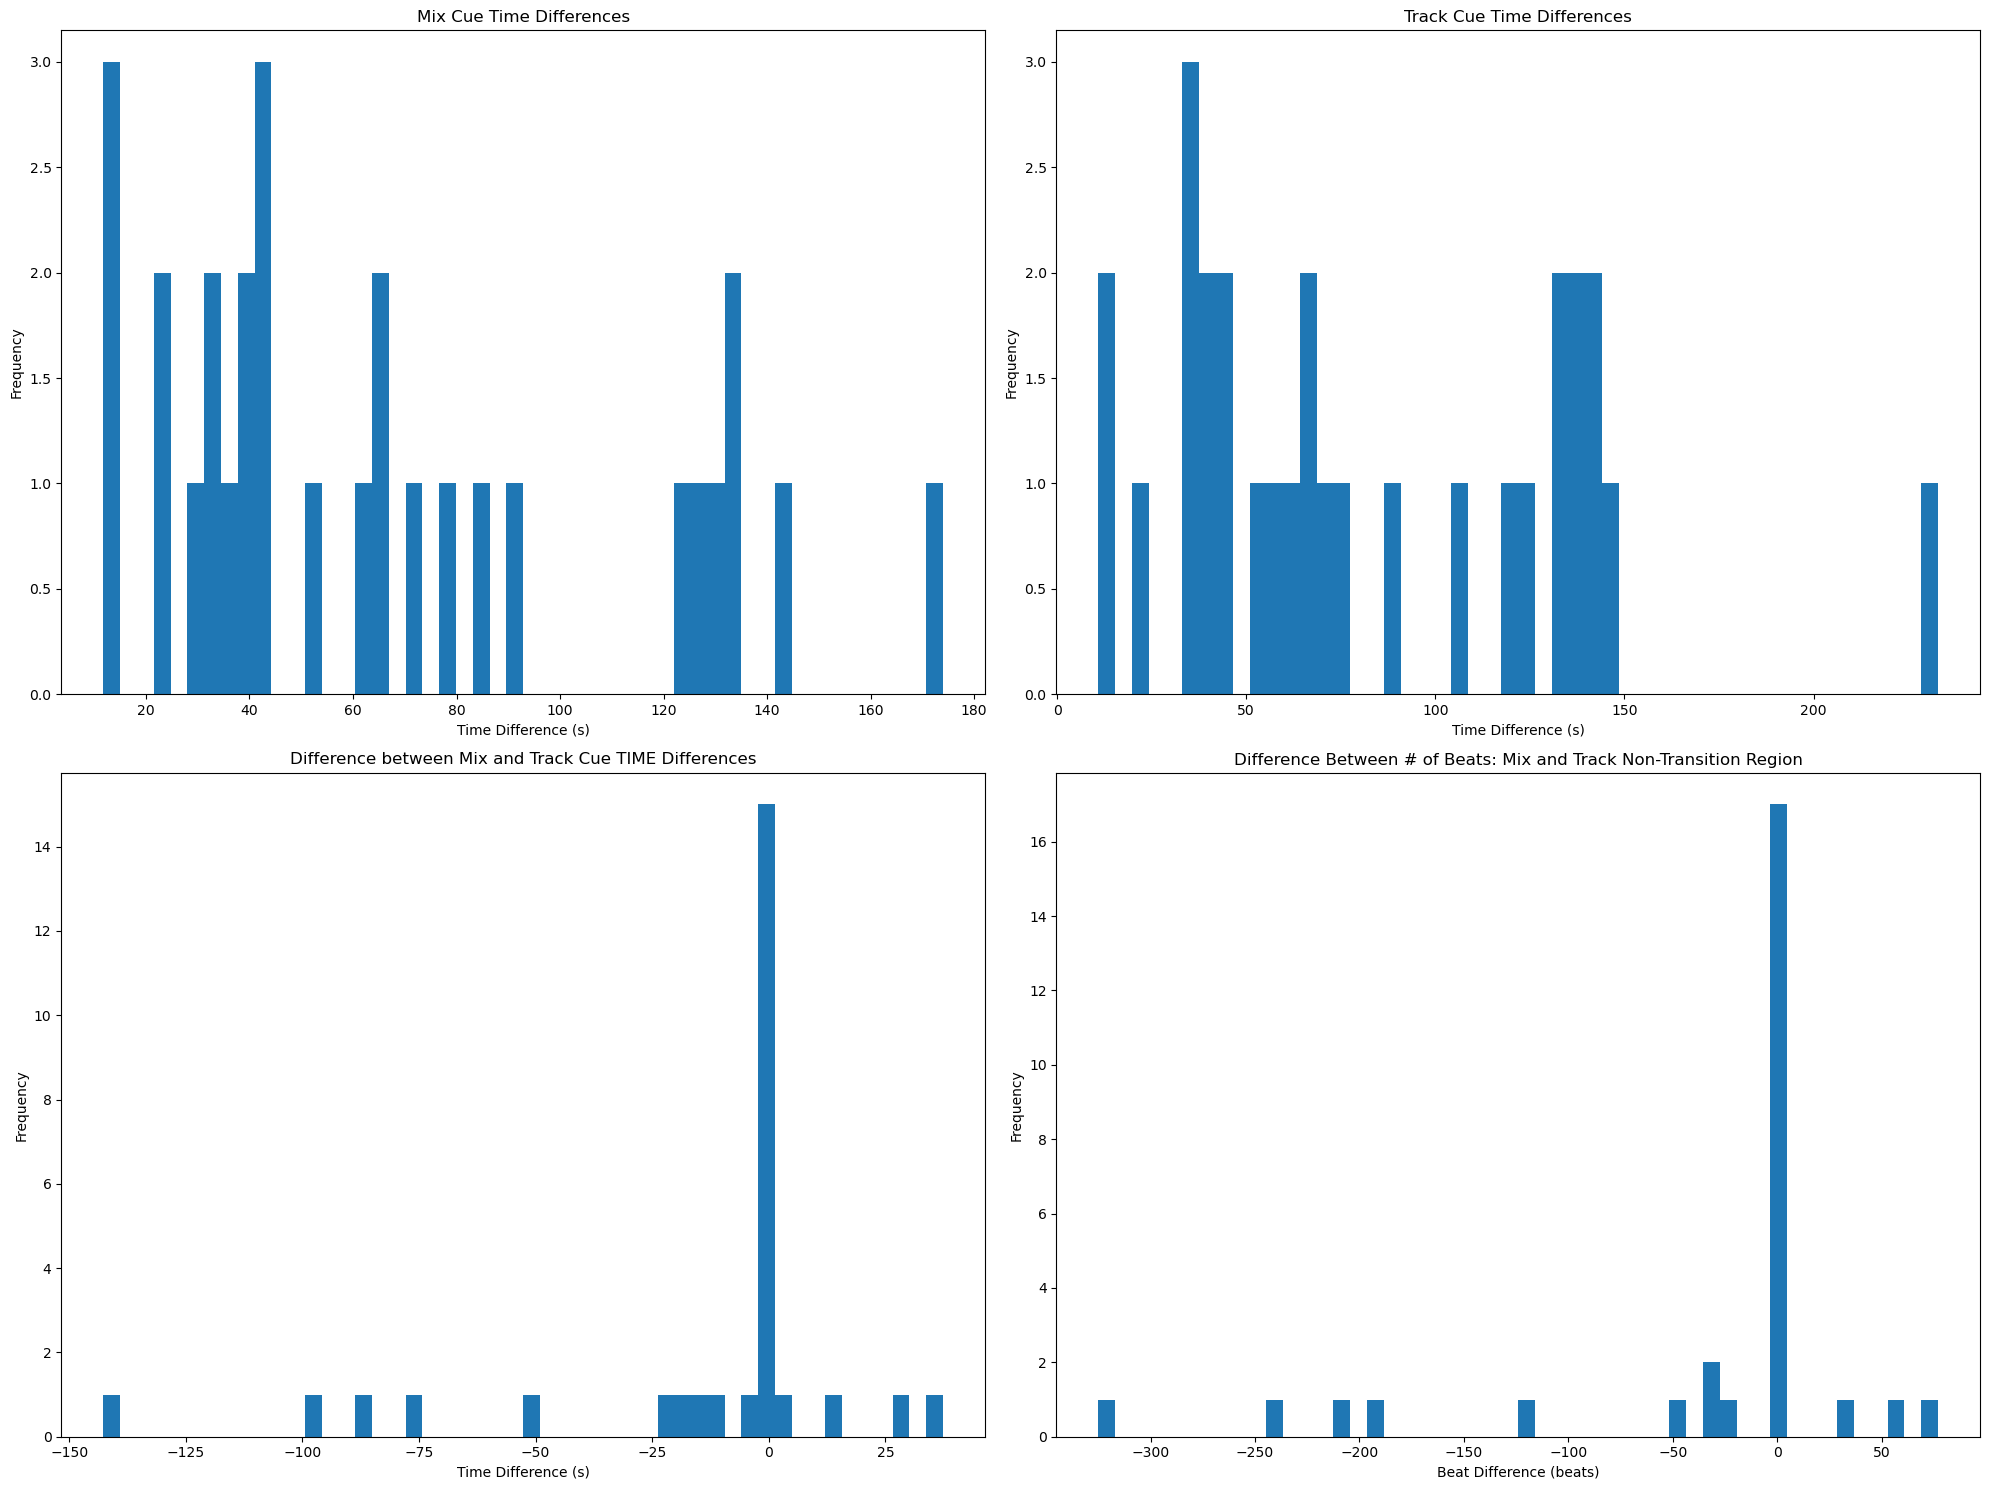

In [27]:
analyze_cue_time_diff(df_mfcc)

Number of tracks with key changes: 0


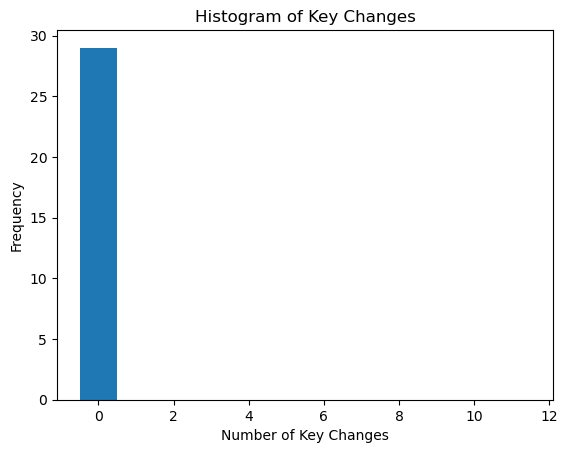

In [28]:
analyze_key_changes(df_mfcc)

In [29]:
check_cue_time_order(df_mfcc)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1mlcb24f
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1s76shlf
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track mwv1cnx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2m76b78x
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1lnhf0jx


# Chroma Pkl

In [21]:
df_chroma = pd.read_pickle('../data/align/jwmtj61-chroma.pkl')

Mix Cue Time Differences:
count     29.000000
mean      79.794483
std       39.300186
min        7.870000
25%       54.280000
50%       66.610000
75%      104.370000
max      173.620000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 39.30018643959841

Track Cue Time Differences:
count     29.000000
mean      92.365862
std       50.367964
min        7.970000
25%       54.370000
50%       77.810000
75%      123.990000
max      224.520000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 50.36796370690695

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -12.571379
std       34.157858
min     -120.150000
25%       -2.010000
50%       -0.410000
75%       -0.090000
max       26.580000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 34.15785767413845

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -27.172414
std       71.044789
min     -256.000000
25%       -6.000000
50%        0.000

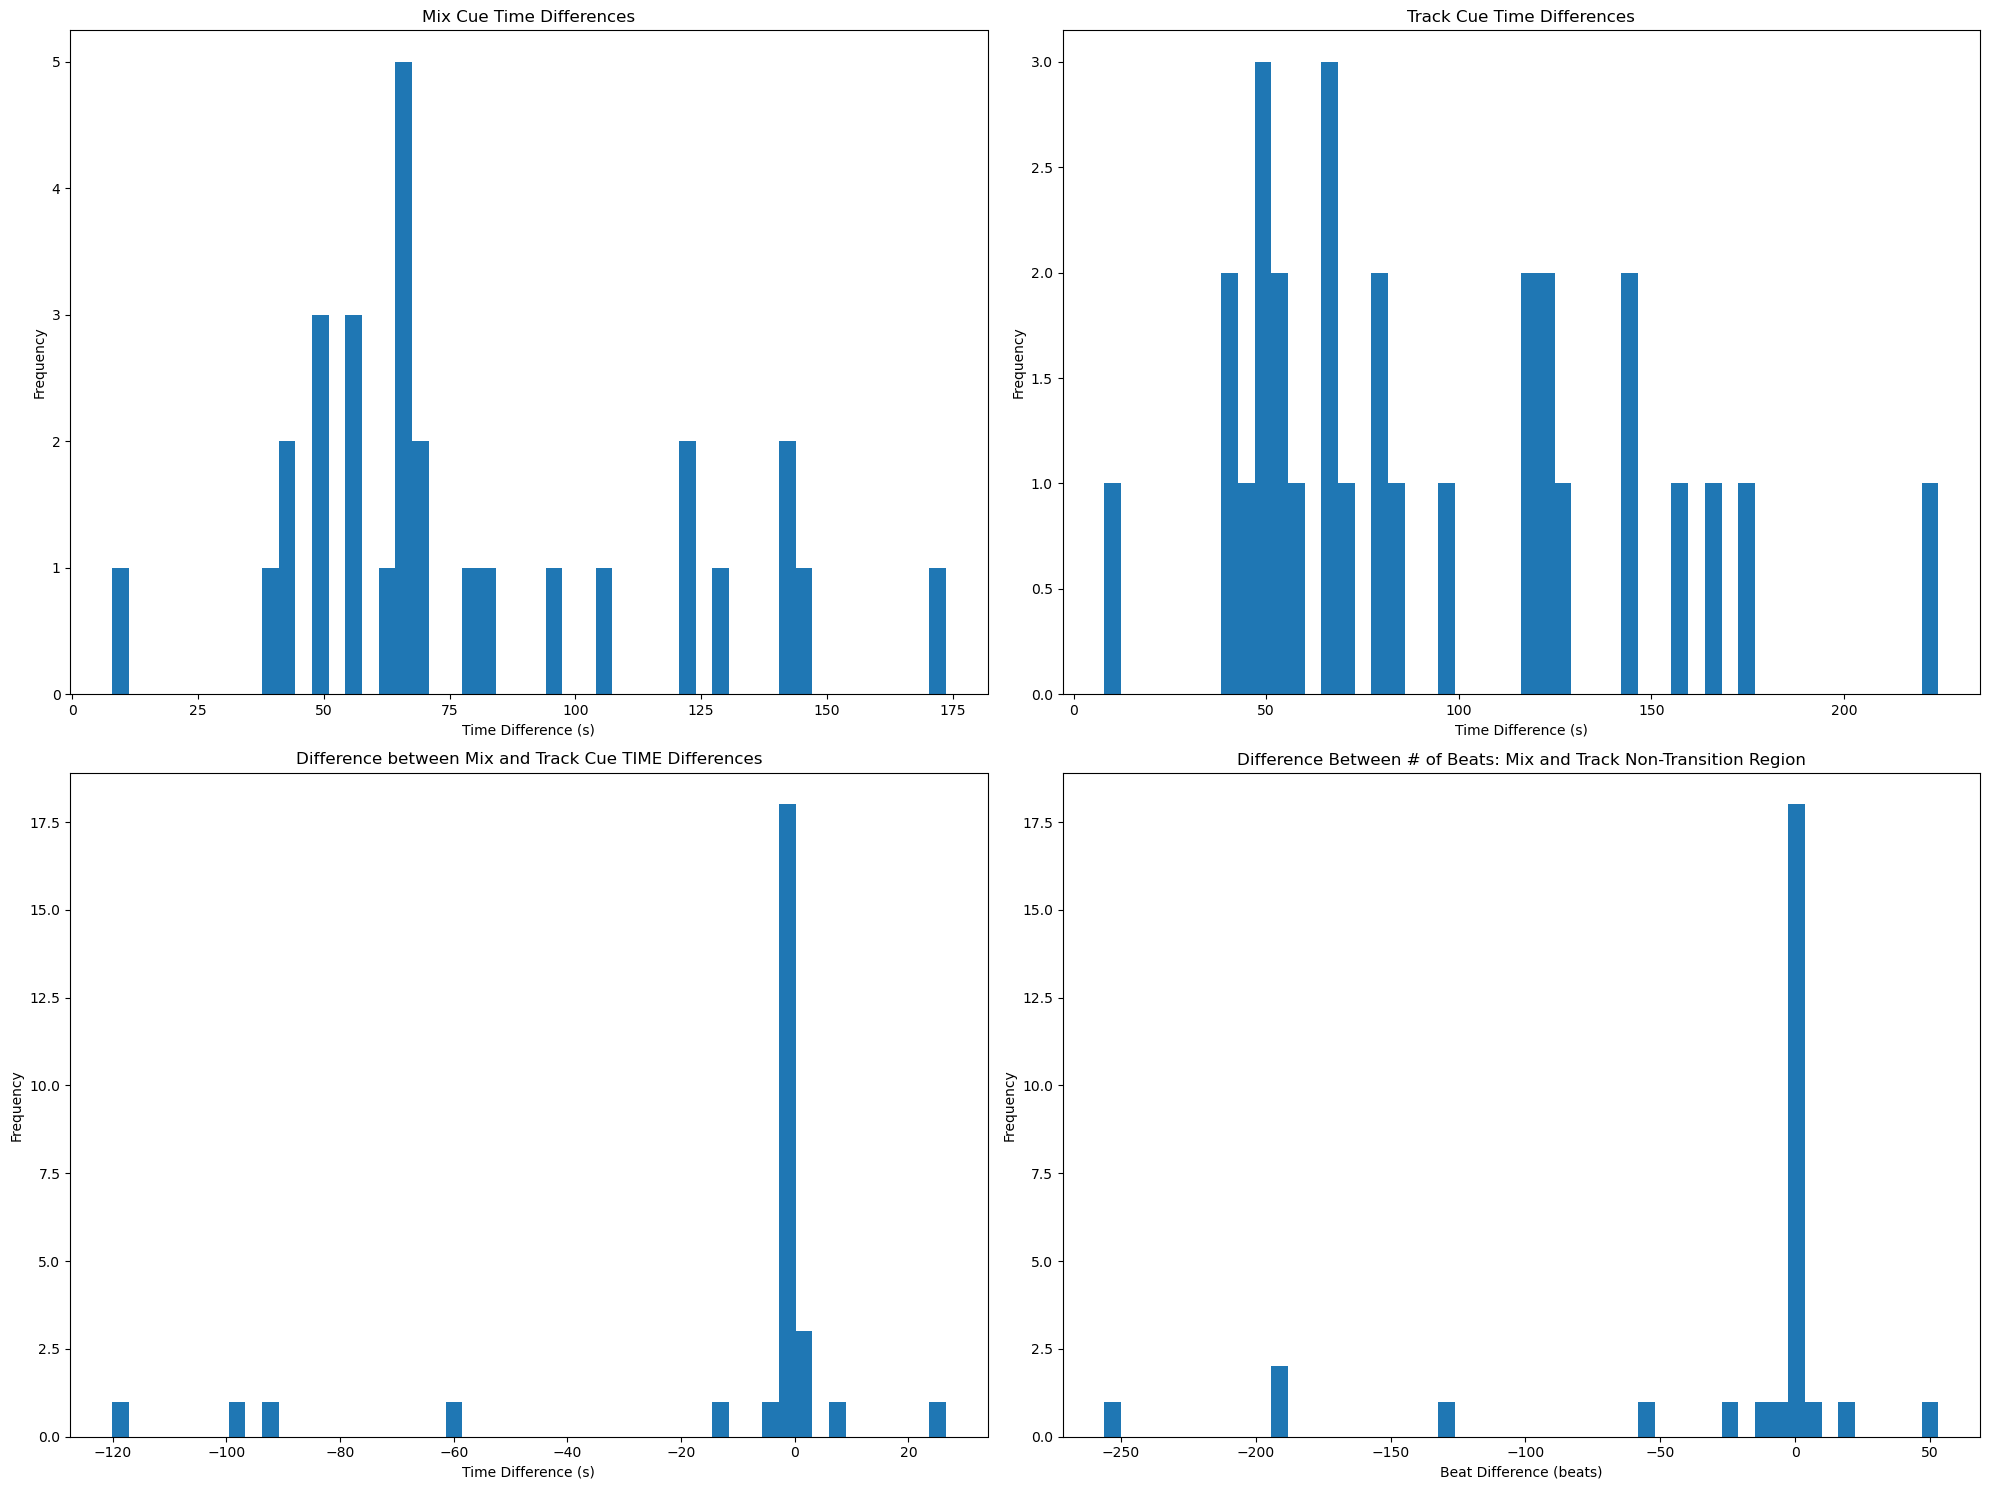

In [23]:
analyze_cue_time_diff(df_chroma)

Number of tracks with key changes: 0


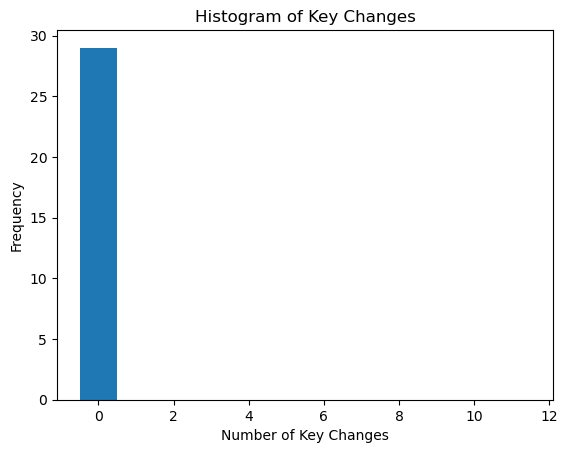

In [24]:
analyze_key_changes(df_chroma)

In [25]:
check_cue_time_order(df_chroma)

All mix_cue_in_time and mix_cue_out_time are in order.


Summary statistics of transition gaps in TIME domain:
count     28.000000
mean      41.524643
std       51.120417
min        4.780000
25%       16.750000
50%       22.700000
75%       38.007500
max      217.910000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      90.500000
std      110.964959
min       12.000000
25%       35.250000
50%       47.500000
75%       89.250000
max      465.000000
Name: beat_transition_gap, dtype: float64



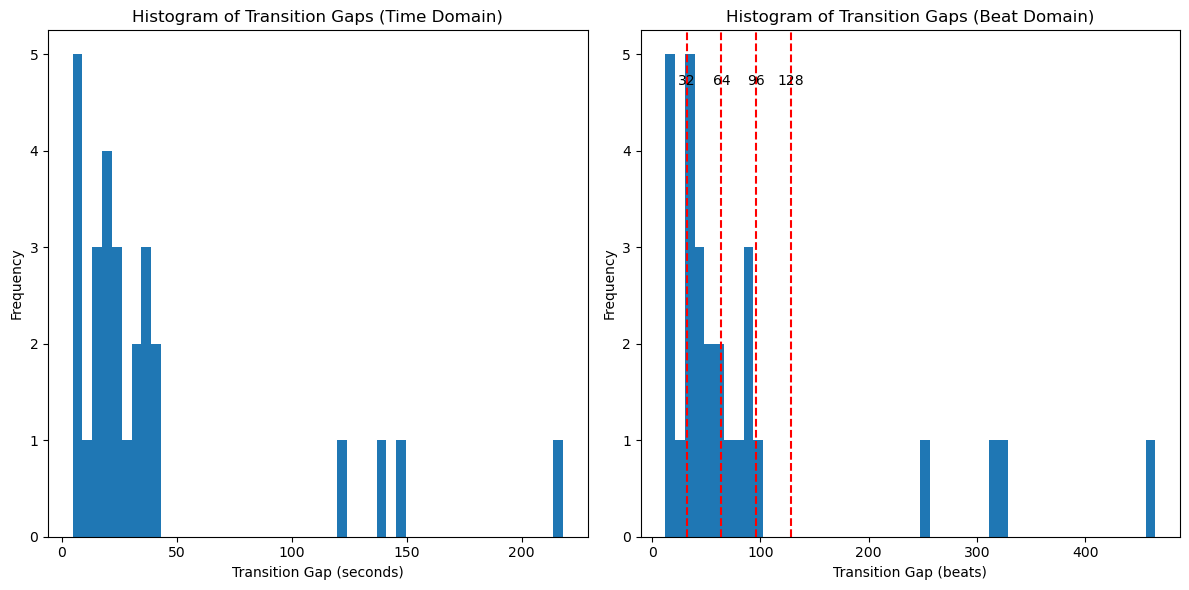

In [26]:
analyze_transition_gaps(df_chroma)

In [31]:
df_chroma[['track_id', 'match_rate', 'best_cost',
           'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
           'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
           'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
           'time_transition_gap', 'beat_transition_gap']].head(8)

,track_id,match_rate,best_cost,mix_cue_in_time,mix_cue_out_time,track_cue_in_time,track_cue_out_time,mix_cue_in_beat,mix_cue_out_beat,track_cue_in_beat,track_cue_out_beat,mix_cue_beat_diff,track_cue_beat_diff,cue_beat_diff_diff,time_transition_gap,beat_transition_gap
0,12t6wktp,1.000000,1.665522,7.95,90.27,0.25,82.87,16,184,0,168,168,168,0,NaN,NaN
1,16juffhx,1.000000,1.756937,108.99,150.88,14.58,56.30,223,312,31,120,89,89,0,18.72,39.0
2,258n7bkf,1.000000,1.766334,171.52,266.70,13.25,108.86,356,560,28,232,204,204,0,20.64,44.0
3,10y0bwb5,0.532847,2.243411,275.51,343.06,50.36,178.80,579,725,107,381,146,274,-128,8.81,19.0
4,g9krvgx,0.902098,1.499962,354.05,416.86,9.85,77.18,749,878,21,164,129,143,-14,10.99,24.0
5,9p7yws5,0.734597,2.196209,438.29,504.90,4.90,84.18,917,1072,11,222,155,211,-56,21.43,39.0
6,1qc2j195,0.913978,2.061584,542.88,597.68,23.82,78.22,1171,1264,59,144,93,85,8,37.98,99.0
7,1mlcb24f,0.426866,1.976836,635.77,702.81,21.62,186.62,1355,1498,37,372,143,335,-192,38.09,91.0


In [37]:
df_chroma.iloc[3]['wp']

array([[448, 764],
       [447, 764],
       [446, 764],
       [445, 763],
       [444, 762],
       [443, 761],
       [442, 760],
       [441, 759],
       [440, 758],
       [439, 757],
       [438, 756],
       [437, 756],
       [436, 756],
       [435, 756],
       [434, 756],
       [433, 756],
       [432, 755],
       [431, 754],
       [430, 753],
       [429, 752],
       [428, 752],
       [427, 752],
       [426, 752],
       [425, 752],
       [424, 752],
       [423, 752],
       [422, 752],
       [421, 752],
       [420, 752],
       [419, 752],
       [418, 751],
       [417, 750],
       [416, 749],
       [415, 749],
       [414, 748],
       [413, 748],
       [412, 748],
       [411, 748],
       [410, 748],
       [409, 748],
       [408, 748],
       [407, 748],
       [406, 748],
       [405, 748],
       [404, 748],
       [403, 748],
       [402, 748],
       [401, 748],
       [400, 748],
       [399, 748],
       [398, 748],
       [397, 748],
       [396,

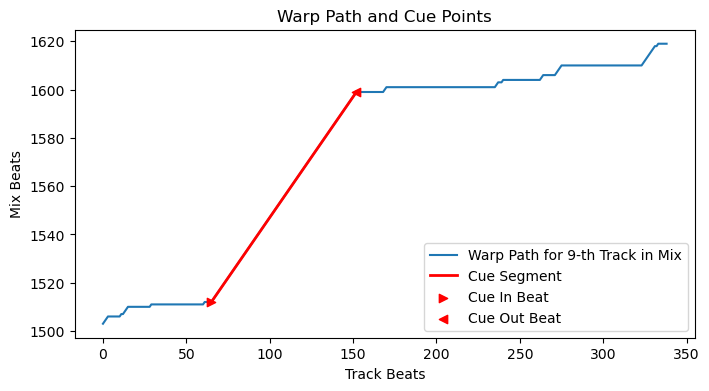

In [126]:
plot_warp_path(df_chroma)

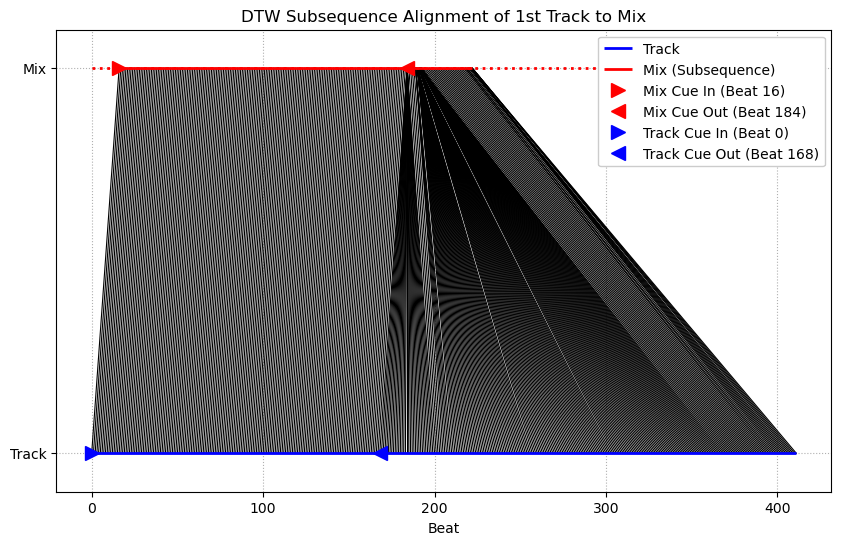

In [128]:
plot_warp_path_connections(df_chroma)

In [130]:
df_chroma.iloc[0]['wp']

array([[411, 222],
       [410, 222],
       [409, 222],
       [408, 222],
       [407, 222],
       [406, 221],
       [405, 221],
       [404, 221],
       [403, 221],
       [402, 221],
       [401, 221],
       [400, 221],
       [399, 221],
       [398, 220],
       [397, 219],
       [396, 219],
       [395, 218],
       [394, 218],
       [393, 217],
       [392, 216],
       [391, 215],
       [390, 214],
       [389, 213],
       [388, 212],
       [387, 211],
       [386, 210],
       [385, 209],
       [384, 208],
       [383, 207],
       [382, 206],
       [381, 205],
       [380, 204],
       [379, 203],
       [378, 202],
       [377, 201],
       [376, 200],
       [375, 199],
       [374, 198],
       [373, 197],
       [372, 196],
       [371, 195],
       [370, 194],
       [369, 193],
       [368, 192],
       [367, 192],
       [366, 192],
       [365, 192],
       [364, 192],
       [363, 192],
       [362, 192],
       [361, 192],
       [360, 192],
       [359,

# Chroma Key Invariant Pkl

In [107]:
df_chroma_key_inv = pd.read_pickle('../data/align/jwmtj61-chroma-key_invariant.pkl')

In [108]:
df_chroma_key_inv.head(2)

,mix_id,track_id,feature,key_invariant,match_rate,key_change,best_cost,costs,wp,mix_cue_in_time,mix_cue_out_time,track_cue_in_time,track_cue_out_time,mix_cue_in_beat,mix_cue_out_beat,track_cue_in_beat,track_cue_out_beat
0,jwmtj61,12t6wktp,chroma,True,0.501217,0,1.665522,"[1.6655221443434998, 2.648717482493616, 2.7857...","[[411, 222], [410, 222], [409, 222], [408, 222...",7.95,90.27,0.25,82.87,16,184,0,168
1,jwmtj61,16juffhx,chroma,True,0.335938,0,1.756937,"[1.7569367111168483, 2.247524936347166, 2.3244...","[[384, 351], [383, 350], [382, 350], [381, 349...",108.99,150.88,14.58,56.30,223,312,31,120


Mix Cue Time Differences:
0    82.32
1    41.89
2    95.18
3    67.55
4    62.81
Name: mix_cue_time_diff, dtype: float64
Mean: 79.79448275862069
Median: 66.60999999999996
Standard Deviation: 39.30018643959841
Min: 7.869999999999891
Max: 173.62000000000012

Track Cue Time Differences:
0     82.62
1     41.72
2     95.61
3    128.44
4     67.33
Name: track_cue_time_diff, dtype: float64
Mean: 92.36586206896553
Median: 77.81
Standard Deviation: 50.36796370690695
Min: 7.969999999999999
Max: 224.52

Difference between Mix and Track Cue Time Differences:
0    -0.30
1     0.17
2    -0.43
3   -60.89
4    -4.52
Name: cue_time_diff_diff, dtype: float64
Mean: -12.571379310344826
Median: -0.4100000000000108
Standard Deviation: 34.15785767413845
Min: -120.14999999999989
Max: 26.580000000000098



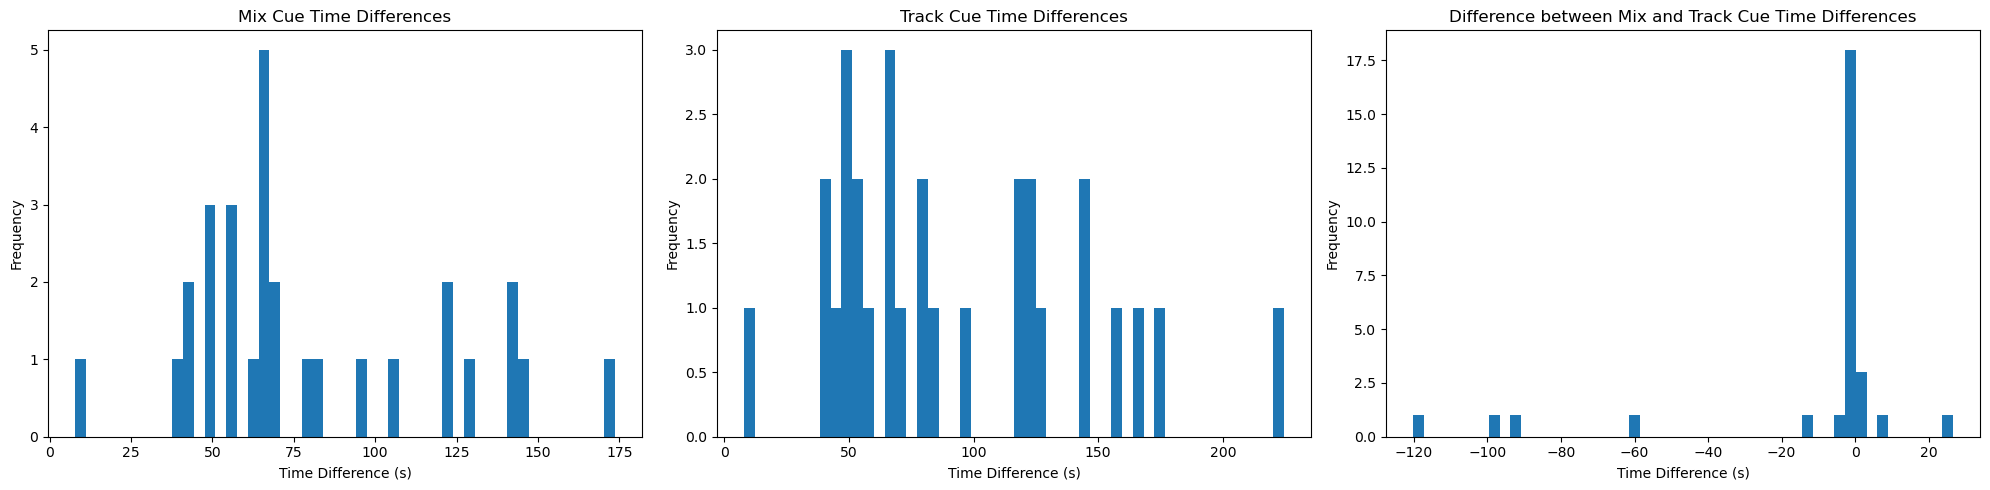

In [109]:
analyze_cue_time_diff(df_chroma_key_inv)

Number of tracks with key changes: 0


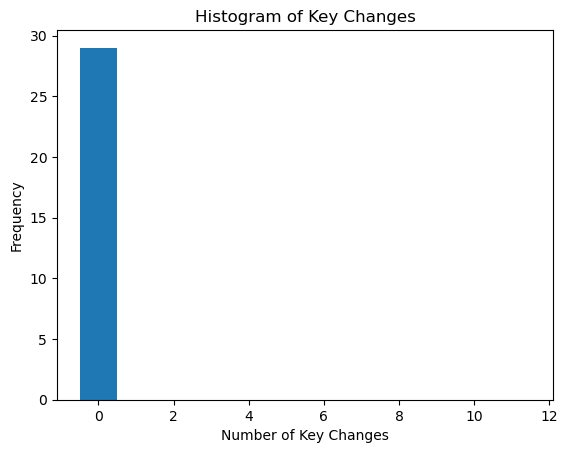

In [110]:
analyze_key_changes(df_chroma_key_inv)

In [111]:
check_cue_time_order(df_chroma_key_inv)

All mix_cue_in_time and mix_cue_out_time are in order.


# Chroma and MFCC Pkl

In [112]:
df_chroma_mfcc = pd.read_pickle('../data/align/jwmtj61-chroma+mfcc.pkl')

In [113]:
df_chroma_mfcc.head(2)

,mix_id,track_id,feature,key_invariant,match_rate,key_change,best_cost,costs,wp,mix_cue_in_time,mix_cue_out_time,track_cue_in_time,track_cue_out_time,mix_cue_in_beat,mix_cue_out_beat,track_cue_in_beat,track_cue_out_beat
0,jwmtj61,12t6wktp,chroma+mfcc,False,0.510949,0,2.401158,[2.4011578310579376],"[[411, 227], [410, 227], [409, 227], [408, 227...",8.46,110.89,0.74,198.36,17,227,1,403
1,jwmtj61,16juffhx,chroma+mfcc,False,0.333333,0,2.673337,[2.6733367988318926],"[[384, 350], [383, 350], [382, 349], [381, 348...",108.99,150.88,14.58,56.30,223,312,31,120


Mix Cue Time Differences:
0    102.43
1     41.89
2     66.80
3     98.16
4     62.92
Name: mix_cue_time_diff, dtype: float64
Mean: 83.2903448275862
Median: 68.06999999999994
Standard Deviation: 42.40689511681178
Min: 9.710000000000036
Max: 170.42000000000007

Track Cue Time Differences:
0    197.62
1     41.72
2     67.03
3     99.37
4     67.46
Name: track_cue_time_diff, dtype: float64
Mean: 104.74344827586206
Median: 81.61
Standard Deviation: 63.47279503151961
Min: 9.84
Max: 266.59

Difference between Mix and Track Cue Time Differences:
0   -95.19
1     0.17
2    -0.23
3    -1.21
4    -4.54
Name: cue_time_diff_diff, dtype: float64
Mean: -21.453103448275865
Median: -0.6399999999999579
Standard Deviation: 41.3526142811041
Min: -119.68000000000029
Max: 7.189999999999998



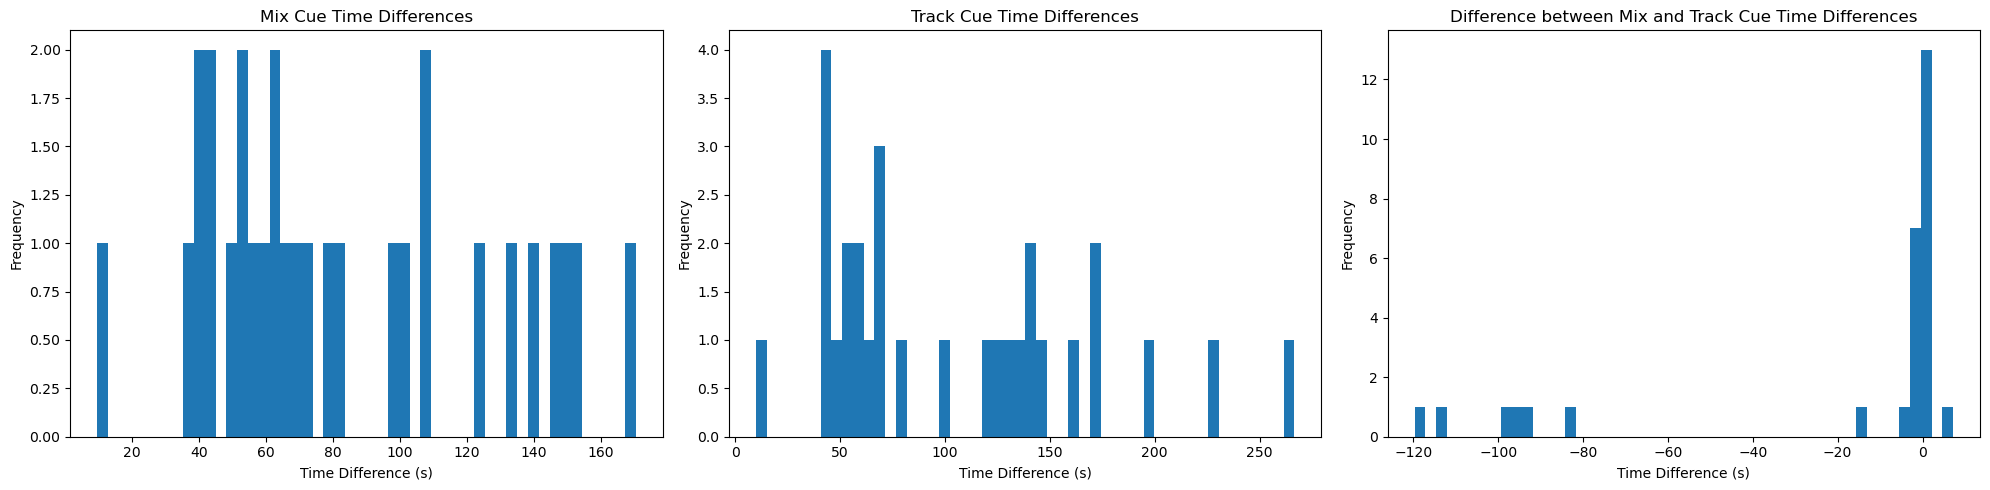

In [114]:
analyze_cue_time_diff(df_chroma_mfcc)

Number of tracks with key changes: 0


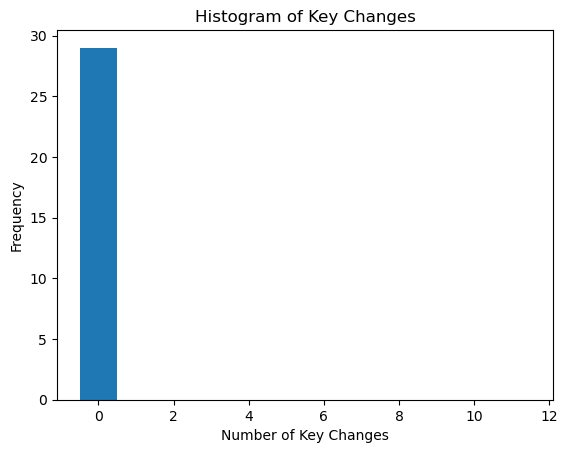

In [116]:
analyze_key_changes(df_chroma_mfcc)

In [119]:
check_cue_time_order(df_chroma_mfcc)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx


# Chroma and MFCC Key Invariant Pkl

In [120]:
df_chroma_mfcc_key_inv = pd.read_pickle('../data/align/jwmtj61-chroma+mfcc-key_invariant.pkl')

In [121]:
df_chroma_mfcc_key_inv.head(2)

,mix_id,track_id,feature,key_invariant,match_rate,key_change,best_cost,costs,wp,mix_cue_in_time,mix_cue_out_time,track_cue_in_time,track_cue_out_time,mix_cue_in_beat,mix_cue_out_beat,track_cue_in_beat,track_cue_out_beat
0,jwmtj61,12t6wktp,chroma+mfcc,True,0.510949,0,2.401158,"[2.4011578310579376, 3.6316766345101397, 3.620...","[[411, 227], [410, 227], [409, 227], [408, 227...",8.46,110.89,0.74,198.36,17,227,1,403
1,jwmtj61,16juffhx,chroma+mfcc,True,0.333333,0,2.673337,"[2.6733367988318926, 3.313664917866619, 3.4233...","[[384, 350], [383, 350], [382, 349], [381, 348...",108.99,150.88,14.58,56.30,223,312,31,120


Mix Cue Time Differences:
0    102.43
1     41.89
2     66.80
3     98.16
4     62.92
Name: mix_cue_time_diff, dtype: float64
Mean: 83.2903448275862
Median: 68.06999999999994
Standard Deviation: 42.40689511681178
Min: 9.710000000000036
Max: 170.42000000000007

Track Cue Time Differences:
0    197.62
1     41.72
2     67.03
3     99.37
4     67.46
Name: track_cue_time_diff, dtype: float64
Mean: 104.74344827586206
Median: 81.61
Standard Deviation: 63.47279503151961
Min: 9.84
Max: 266.59

Difference between Mix and Track Cue Time Differences:
0   -95.19
1     0.17
2    -0.23
3    -1.21
4    -4.54
Name: cue_time_diff_diff, dtype: float64
Mean: -21.453103448275865
Median: -0.6399999999999579
Standard Deviation: 41.3526142811041
Min: -119.68000000000029
Max: 7.189999999999998



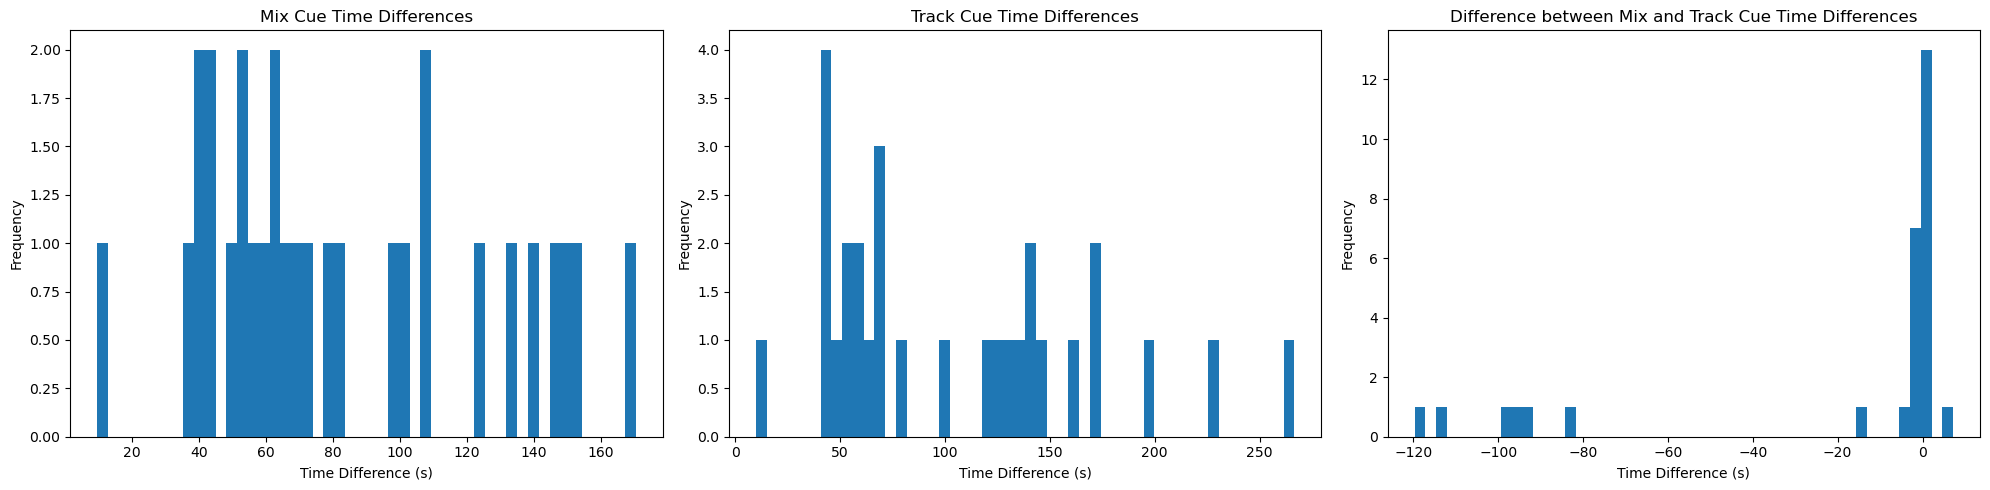

In [123]:
analyze_cue_time_diff(df_chroma_mfcc_key_inv)

Number of tracks with key changes: 0


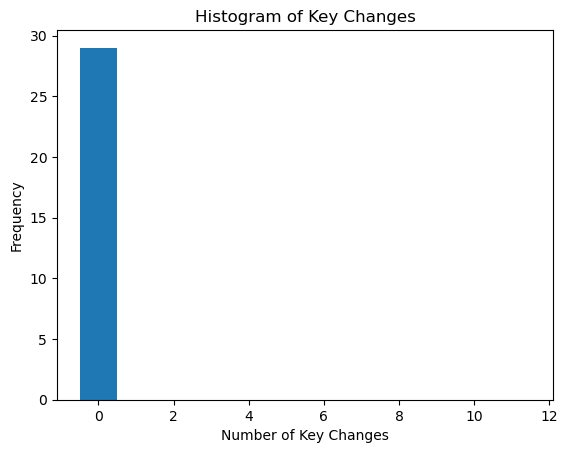

In [124]:
analyze_key_changes(df_chroma_mfcc_key_inv)

In [125]:
check_cue_time_order(df_chroma_mfcc_key_inv)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx


# Chroma, MFCC, Spectral Contrast

In [3]:
df_chroma_mfcc_sc = pd.read_pickle('../data/align/jwmtj61-chroma+mfcc+spectral_contrast.pkl')

Mix Cue Time Differences:
count     29.000000
mean      88.712414
std       42.758787
min        9.720000
25%       59.040000
50%       81.610000
75%      108.160000
max      179.460000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 42.758787205102415

Track Cue Time Differences:
count     29.000000
mean     112.282069
std       64.153241
min        9.840000
25%       60.000000
50%       99.380000
75%      163.350000
max      270.000000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 64.15324111505593

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -23.569655
std       43.474500
min     -119.620000
25%      -15.410000
50%       -0.740000
75%        0.070000
max       14.840000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 43.47450028323323

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -48.517241
std       91.106147
min     -256.000000
25%      -32.000000
50%        0.00

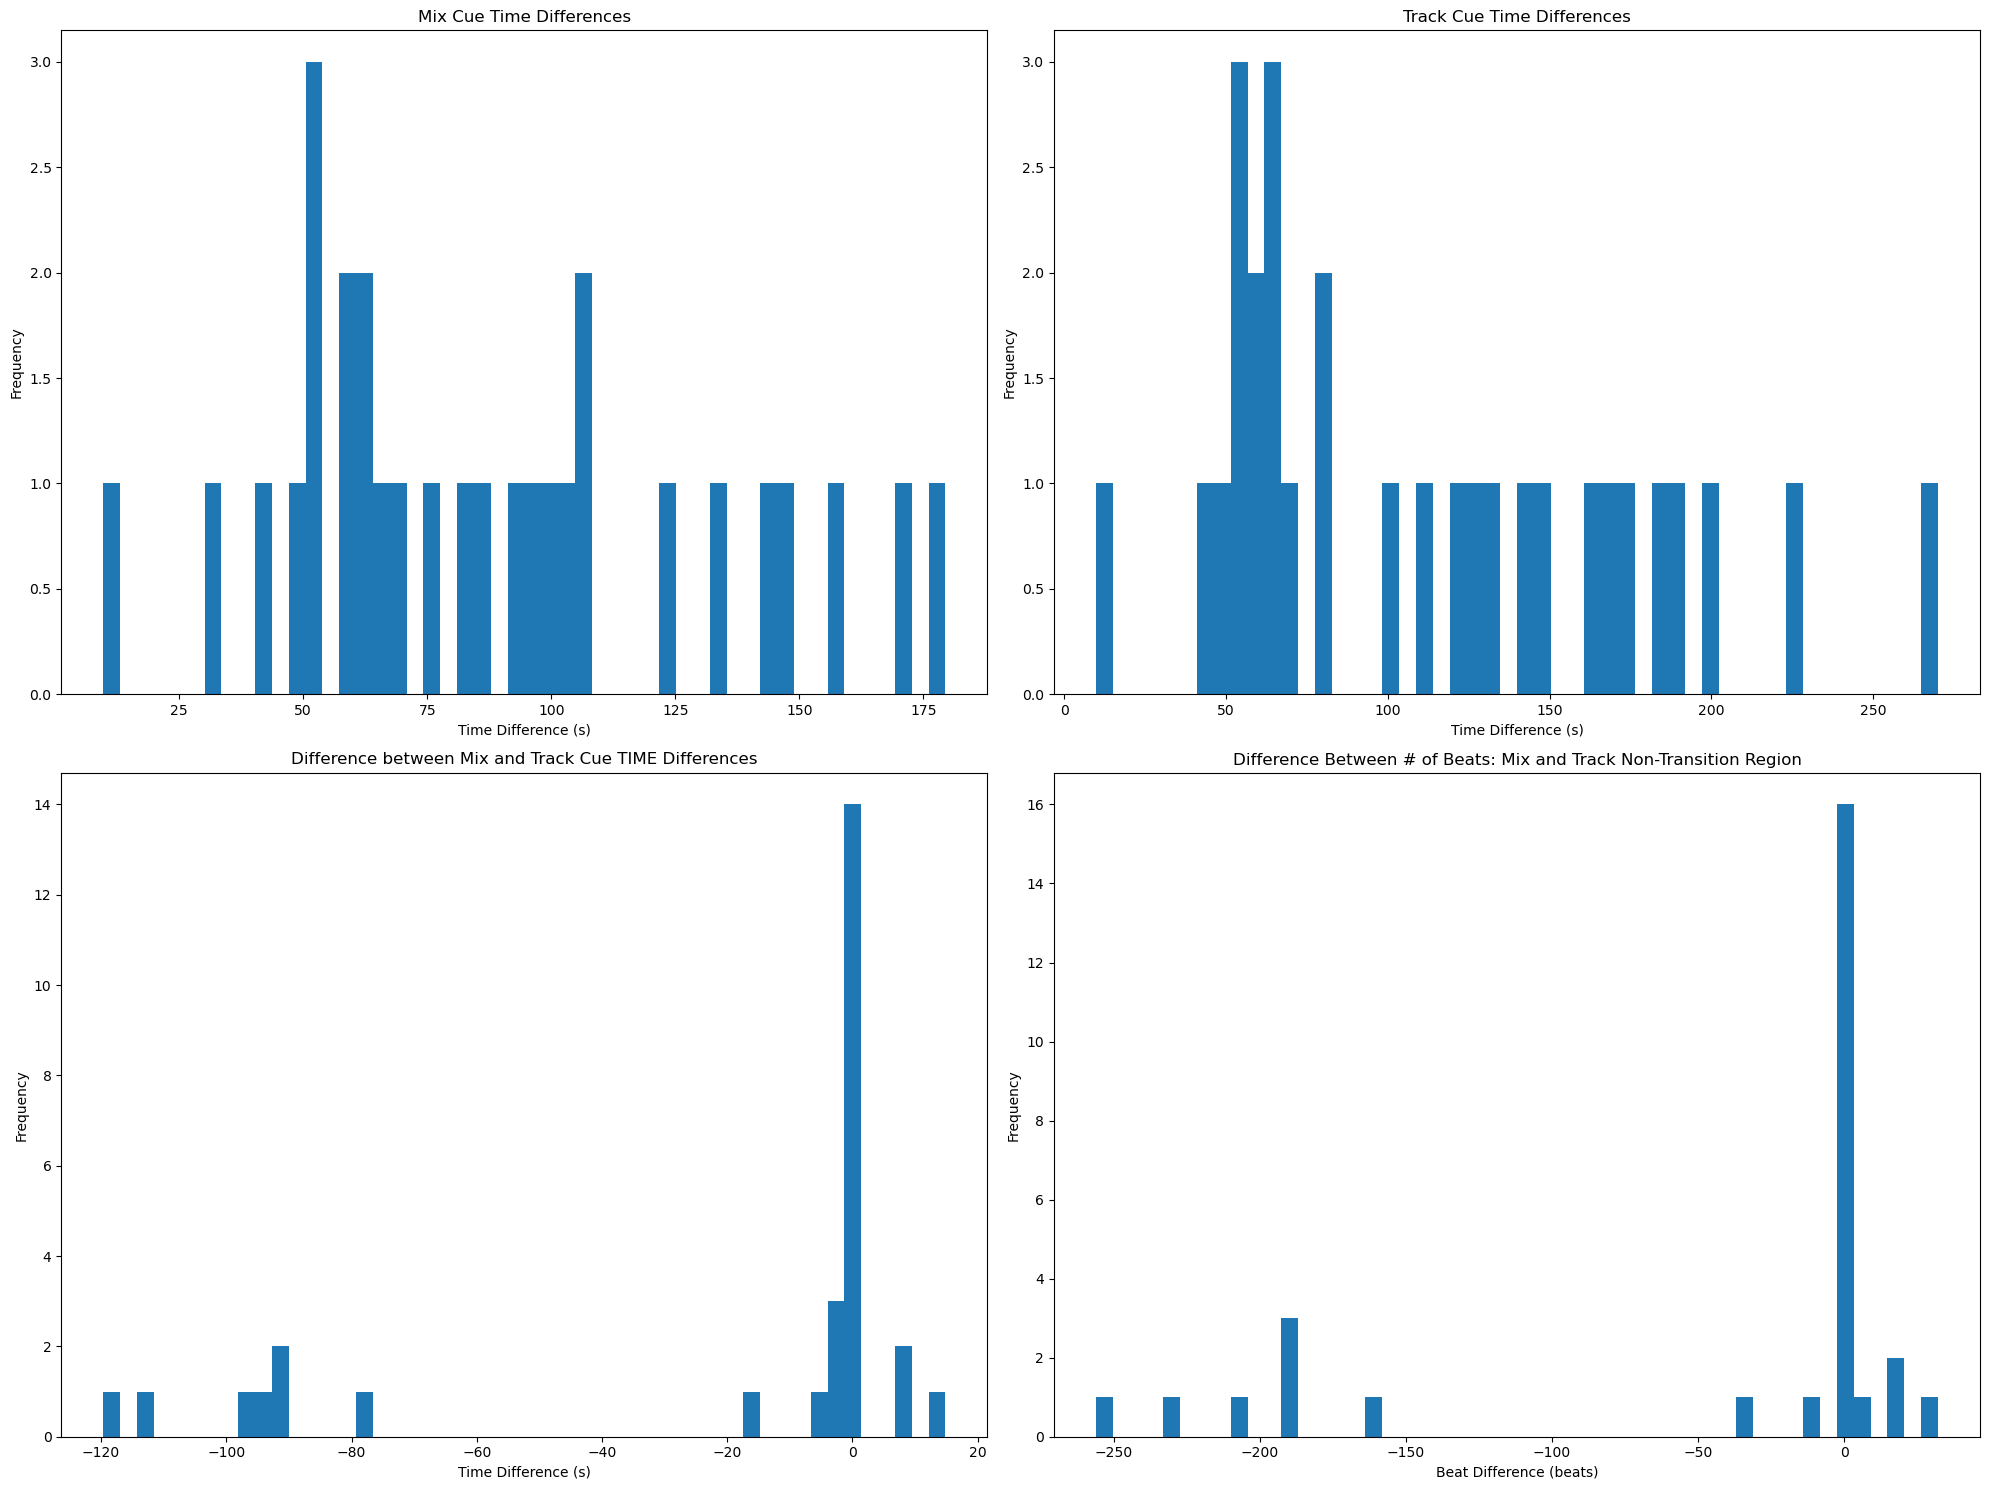

In [10]:
analyze_cue_time_diff(df_chroma_mfcc_sc)

Number of tracks with key changes: 0


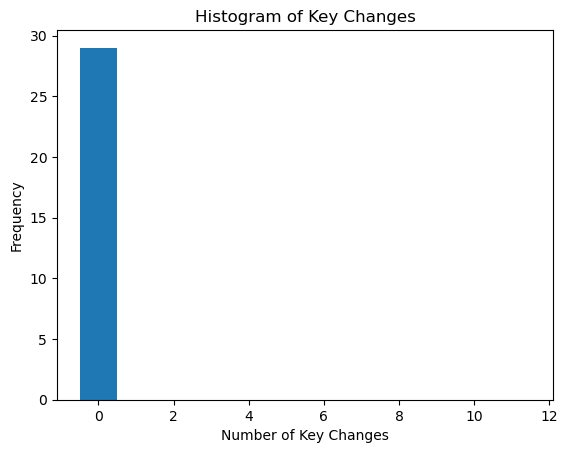

In [11]:
analyze_key_changes(df_chroma_mfcc_sc)

In [12]:
check_cue_time_order(df_chroma_mfcc_sc)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 10y0bwb5
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2rwj144f


Summary statistics of transition gaps in TIME domain:
count     28.00000
mean      32.69750
std       51.66767
min      -19.99000
25%       12.06500
50%       20.62000
75%       33.62750
max      258.81000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      70.000000
std      109.804877
min      -43.000000
25%       26.000000
50%       42.500000
75%       73.500000
max      550.000000
Name: beat_transition_gap, dtype: float64



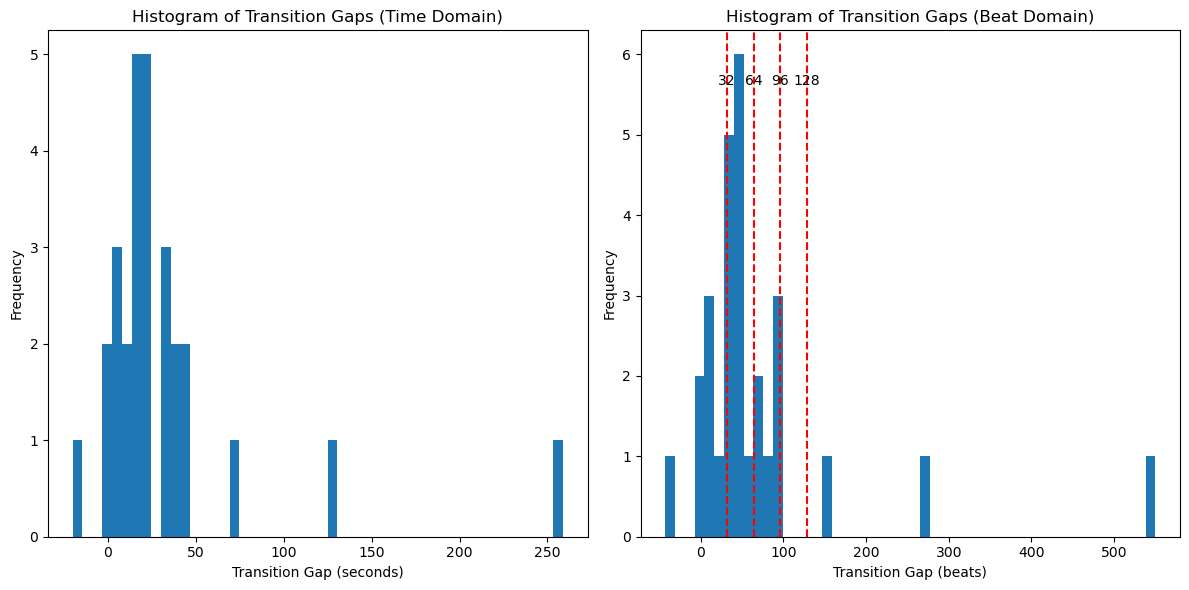

In [14]:
analyze_transition_gaps(df_chroma_mfcc_sc)

In [15]:
df_chroma_mfcc_sc[['track_id', 'match_rate', 'best_cost',
                    'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
                    'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
                    'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
                    'time_transition_gap', 'beat_transition_gap']].head(8)

,track_id,match_rate,best_cost,mix_cue_in_time,mix_cue_out_time,track_cue_in_time,track_cue_out_time,mix_cue_in_beat,mix_cue_out_beat,track_cue_in_beat,track_cue_out_beat,mix_cue_beat_diff,track_cue_beat_diff,cue_beat_diff_diff,time_transition_gap,beat_transition_gap
0,12t6wktp,0.524752,2.501928,7.98,111.36,0.23,198.87,16,228,0,404,212,404,-192,NaN,NaN
1,16juffhx,1.000000,2.725741,109.46,151.34,15.05,56.76,224,313,32,121,89,89,0,-1.90,-4.0
2,258n7bkf,0.518797,2.846221,173.86,270.40,15.56,202.62,361,568,33,432,207,399,-192,22.52,48.0
3,10y0bwb5,1.000000,3.286033,250.41,348.57,25.04,124.42,525,737,53,265,212,212,0,-19.99,-43.0
4,g9krvgx,0.916667,2.423444,354.95,417.97,10.31,77.78,751,905,22,190,154,168,-14,6.38,14.0
5,9p7yws5,1.000000,3.123666,439.36,491.73,5.79,57.52,946,1065,13,132,119,119,0,21.39,41.0
6,1qc2j195,1.000000,3.129376,522.86,604.47,3.41,85.01,1135,1339,8,212,204,204,0,31.13,70.0
7,1mlcb24f,0.465296,2.895774,618.42,703.26,4.26,186.61,1373,1554,9,398,181,389,-208,13.95,34.0


In [16]:
df_chroma_mfcc_sc.iloc[3]['wp']

array([[450, 769],
       [449, 769],
       [448, 769],
       [447, 769],
       [446, 769],
       [445, 769],
       [444, 769],
       [443, 769],
       [442, 769],
       [441, 769],
       [440, 769],
       [439, 769],
       [438, 769],
       [437, 769],
       [436, 769],
       [435, 769],
       [434, 769],
       [433, 769],
       [432, 769],
       [431, 769],
       [430, 769],
       [429, 769],
       [428, 769],
       [427, 769],
       [426, 769],
       [425, 769],
       [424, 769],
       [423, 769],
       [422, 769],
       [421, 769],
       [420, 769],
       [419, 769],
       [418, 769],
       [417, 769],
       [416, 769],
       [415, 769],
       [414, 769],
       [413, 769],
       [412, 769],
       [411, 769],
       [410, 769],
       [409, 769],
       [408, 769],
       [407, 769],
       [406, 769],
       [405, 769],
       [404, 769],
       [403, 769],
       [402, 769],
       [401, 769],
       [400, 769],
       [399, 769],
       [398,

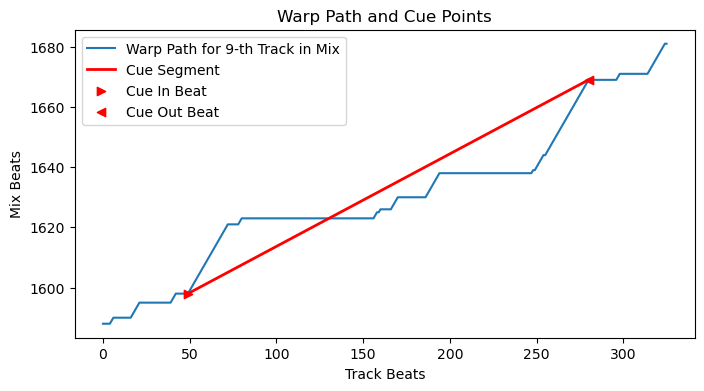

In [17]:
plot_warp_path(df_chroma_mfcc_sc)

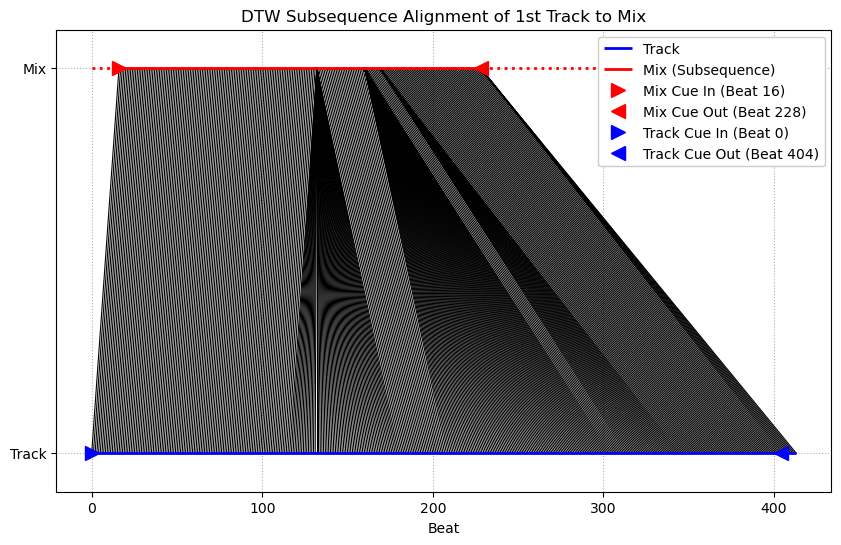

In [19]:
plot_warp_path_connections(df_chroma_mfcc_sc)

In [ ]:
df_chroma_mfcc_sc.iloc[0]['wp']

array([[411, 222],
       [410, 222],
       [409, 222],
       [408, 222],
       [407, 222],
       [406, 221],
       [405, 221],
       [404, 221],
       [403, 221],
       [402, 221],
       [401, 221],
       [400, 221],
       [399, 221],
       [398, 220],
       [397, 219],
       [396, 219],
       [395, 218],
       [394, 218],
       [393, 217],
       [392, 216],
       [391, 215],
       [390, 214],
       [389, 213],
       [388, 212],
       [387, 211],
       [386, 210],
       [385, 209],
       [384, 208],
       [383, 207],
       [382, 206],
       [381, 205],
       [380, 204],
       [379, 203],
       [378, 202],
       [377, 201],
       [376, 200],
       [375, 199],
       [374, 198],
       [373, 197],
       [372, 196],
       [371, 195],
       [370, 194],
       [369, 193],
       [368, 192],
       [367, 192],
       [366, 192],
       [365, 192],
       [364, 192],
       [363, 192],
       [362, 192],
       [361, 192],
       [360, 192],
       [359,

# Chroma, MFCC, Spectral Contrast, Downbeat Prob, Onset Strength

In [ ]:
df_chroma_mfcc_sc = pd.read_pickle('../data/align/jwmtj61-chroma+mfcc+spectral_contrast.pkl')

Mix Cue Time Differences:
count     29.000000
mean      88.712414
std       42.758787
min        9.720000
25%       59.040000
50%       81.610000
75%      108.160000
max      179.460000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 42.758787205102415

Track Cue Time Differences:
count     29.000000
mean     112.282069
std       64.153241
min        9.840000
25%       60.000000
50%       99.380000
75%      163.350000
max      270.000000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 64.15324111505593

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -23.569655
std       43.474500
min     -119.620000
25%      -15.410000
50%       -0.740000
75%        0.070000
max       14.840000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 43.47450028323323

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -48.517241
std       91.106147
min     -256.000000
25%      -32.000000
50%        0.00

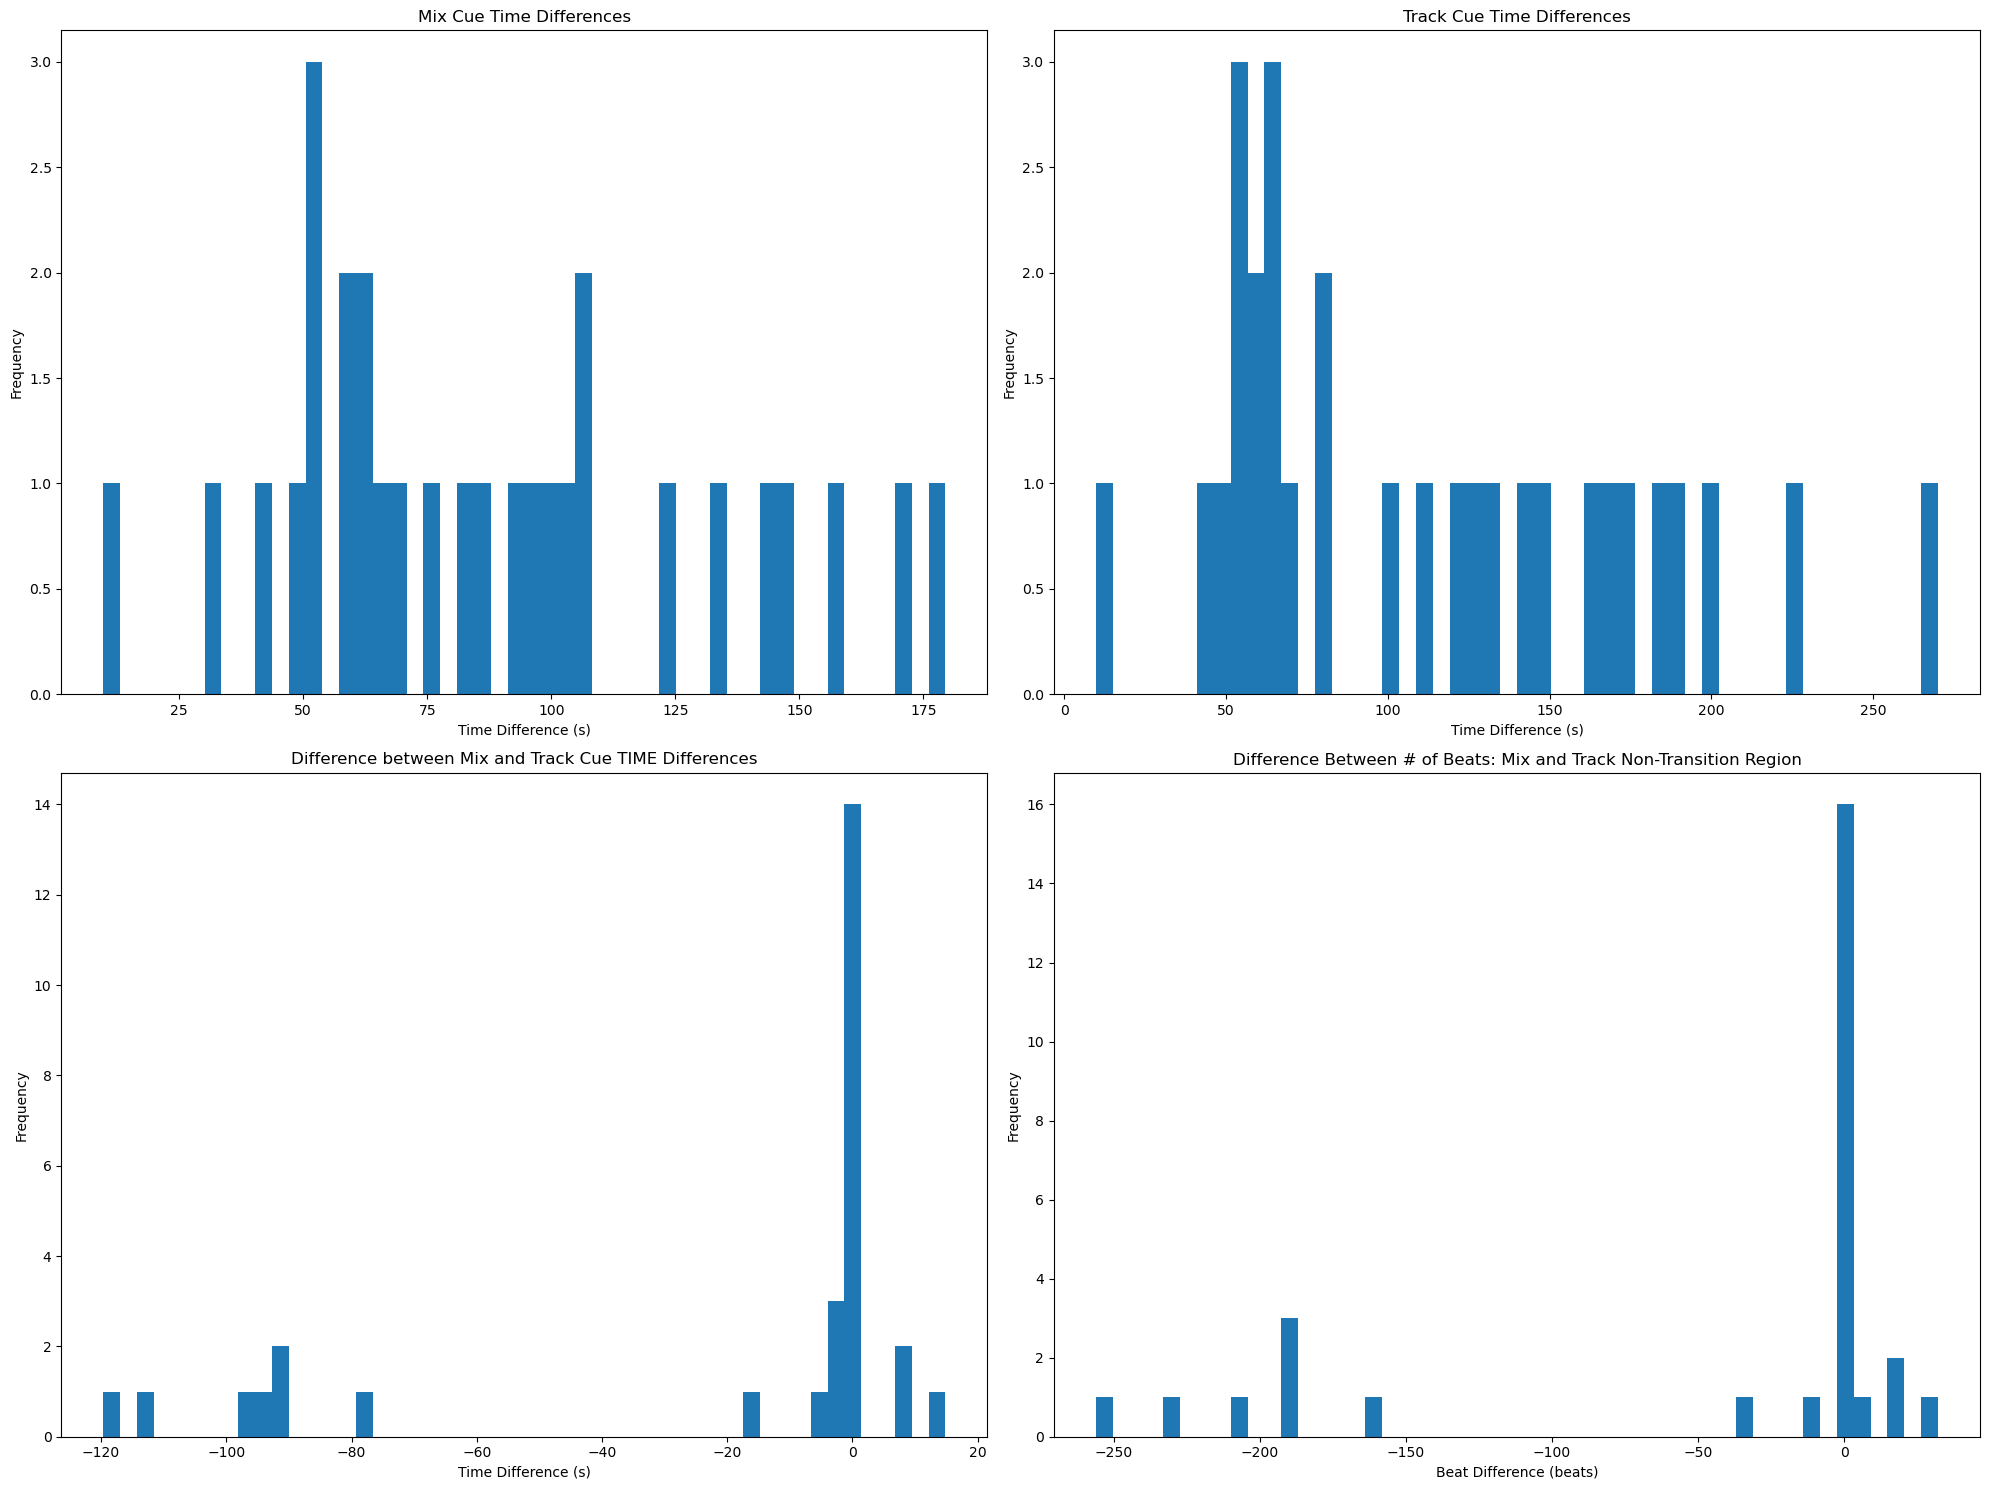

In [ ]:
analyze_cue_time_diff(df_chroma_mfcc_sc)

Number of tracks with key changes: 0


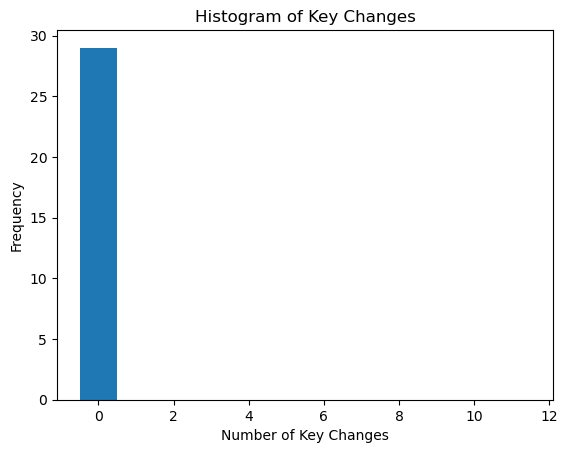

In [ ]:
analyze_key_changes(df_chroma_mfcc_sc)

In [ ]:
check_cue_time_order(df_chroma_mfcc_sc)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 10y0bwb5
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2rwj144f


Summary statistics of transition gaps in TIME domain:
count     28.00000
mean      32.69750
std       51.66767
min      -19.99000
25%       12.06500
50%       20.62000
75%       33.62750
max      258.81000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      70.000000
std      109.804877
min      -43.000000
25%       26.000000
50%       42.500000
75%       73.500000
max      550.000000
Name: beat_transition_gap, dtype: float64



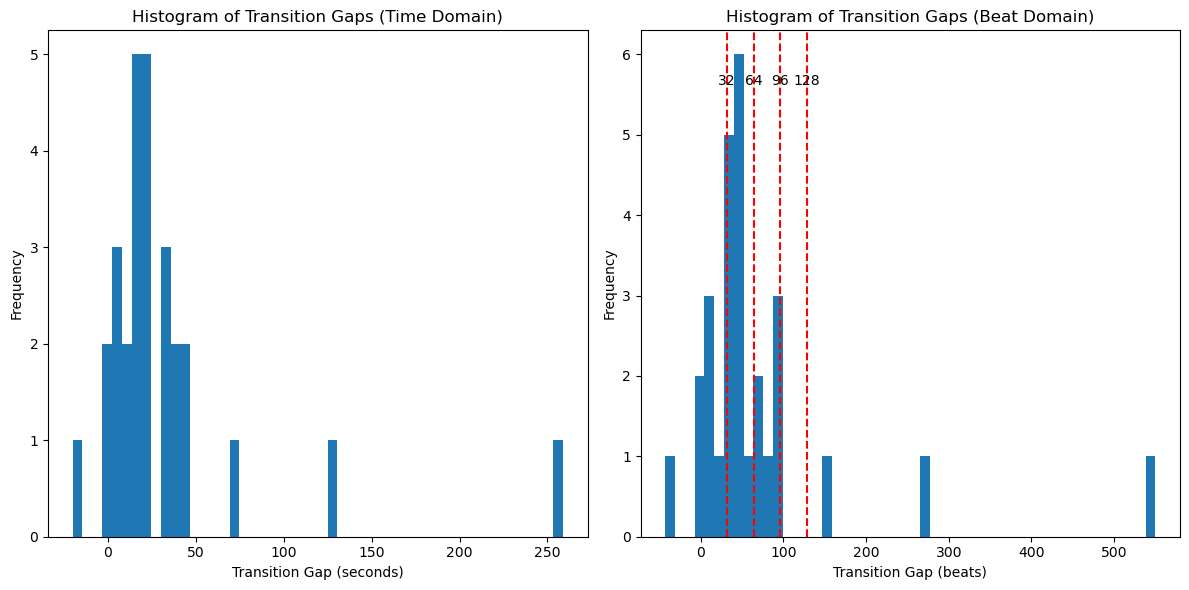

In [ ]:
analyze_transition_gaps(df_chroma_mfcc_sc)

In [ ]:
df_chroma_mfcc_sc[['track_id', 'match_rate', 'best_cost',
                    'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
                    'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
                    'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
                    'time_transition_gap', 'beat_transition_gap']].head(8)

,track_id,match_rate,best_cost,mix_cue_in_time,mix_cue_out_time,track_cue_in_time,track_cue_out_time,mix_cue_in_beat,mix_cue_out_beat,track_cue_in_beat,track_cue_out_beat,mix_cue_beat_diff,track_cue_beat_diff,cue_beat_diff_diff,time_transition_gap,beat_transition_gap
0,12t6wktp,0.524752,2.501928,7.98,111.36,0.23,198.87,16,228,0,404,212,404,-192,NaN,NaN
1,16juffhx,1.000000,2.725741,109.46,151.34,15.05,56.76,224,313,32,121,89,89,0,-1.90,-4.0
2,258n7bkf,0.518797,2.846221,173.86,270.40,15.56,202.62,361,568,33,432,207,399,-192,22.52,48.0
3,10y0bwb5,1.000000,3.286033,250.41,348.57,25.04,124.42,525,737,53,265,212,212,0,-19.99,-43.0
4,g9krvgx,0.916667,2.423444,354.95,417.97,10.31,77.78,751,905,22,190,154,168,-14,6.38,14.0
5,9p7yws5,1.000000,3.123666,439.36,491.73,5.79,57.52,946,1065,13,132,119,119,0,21.39,41.0
6,1qc2j195,1.000000,3.129376,522.86,604.47,3.41,85.01,1135,1339,8,212,204,204,0,31.13,70.0
7,1mlcb24f,0.465296,2.895774,618.42,703.26,4.26,186.61,1373,1554,9,398,181,389,-208,13.95,34.0


In [ ]:
df_chroma_mfcc_sc.iloc[3]['wp']

array([[450, 769],
       [449, 769],
       [448, 769],
       [447, 769],
       [446, 769],
       [445, 769],
       [444, 769],
       [443, 769],
       [442, 769],
       [441, 769],
       [440, 769],
       [439, 769],
       [438, 769],
       [437, 769],
       [436, 769],
       [435, 769],
       [434, 769],
       [433, 769],
       [432, 769],
       [431, 769],
       [430, 769],
       [429, 769],
       [428, 769],
       [427, 769],
       [426, 769],
       [425, 769],
       [424, 769],
       [423, 769],
       [422, 769],
       [421, 769],
       [420, 769],
       [419, 769],
       [418, 769],
       [417, 769],
       [416, 769],
       [415, 769],
       [414, 769],
       [413, 769],
       [412, 769],
       [411, 769],
       [410, 769],
       [409, 769],
       [408, 769],
       [407, 769],
       [406, 769],
       [405, 769],
       [404, 769],
       [403, 769],
       [402, 769],
       [401, 769],
       [400, 769],
       [399, 769],
       [398,

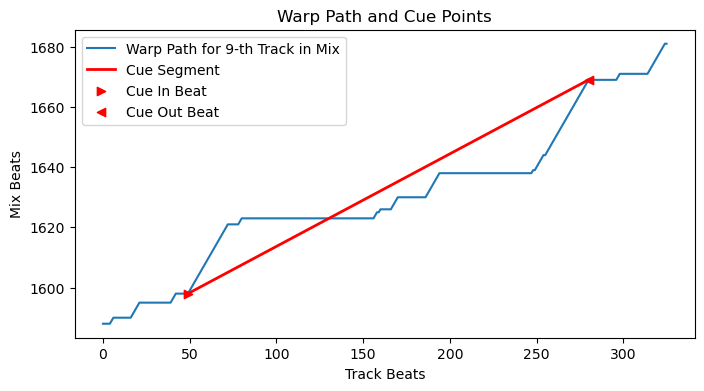

In [ ]:
plot_warp_path(df_chroma_mfcc_sc)

In [ ]:
def plot_warp_path_connections(df):
    # First track in mix
    row = df.iloc[0]
    
    # Extract warp path
    warp_path = row['wp']

    # Convert warp path to numpy array for easier plotting
    warp_path = np.array(warp_path)

    # Extract all i and j values
    i_vals = [pair[0] for pair in warp_path]
    j_vals = [pair[1] for pair in warp_path]
    
    # Determine min/max for the track and the mix
    i_min, i_max = min(i_vals), max(i_vals)
    j_min, j_max = min(j_vals), max(j_vals)
    
    # Create a figure
    plt.figure(figsize=(10, 6))

    # Draw lines connecting matched points in the warp path
    for (i, j) in warp_path:
        plt.plot([i, j], [0, 1], color='black', linewidth=0.8)
    
    # Plot horizontal line for the entire track range at y=0 (blue)
    plt.hlines(y=0, xmin=i_min, xmax=i_max, color='blue', linewidth=2, label='Track')
    
    # Plot horizontal line for the relevant mix subsequence at y=1 (red)
    plt.hlines(y=1, xmin=j_min, xmax=j_max, color='red', linewidth=2, label='Mix (Subsequence)')

    # Plot extended horizontal line for the mix at y=1 (red, dotted)
    plt.hlines(y=1, xmin=i_min, xmax=i_max, color='red', linestyle='dotted', linewidth=2)

    # Plot cue markers:
    # Extract cue points from the row
    track_cue_in_beat = row['track_cue_in_beat']
    track_cue_out_beat = row['track_cue_out_beat']
    mix_cue_in_beat = row['mix_cue_in_beat']
    mix_cue_out_beat = row['mix_cue_out_beat']

    # Mix cue markers at y=1:
    plt.plot(mix_cue_in_beat, 1, marker='>', markersize=10, color='red', linestyle='None', label=f'Mix Cue In (Beat {mix_cue_in_beat})')
    plt.plot(mix_cue_out_beat, 1, marker='<', markersize=10, color='red', linestyle='None', label=f'Mix Cue Out (Beat {mix_cue_out_beat})')

    # Track cue markers at y=0:
    plt.plot(track_cue_in_beat, 0, marker='>', markersize=10, color='blue', linestyle='None', label=f'Track Cue In (Beat {track_cue_in_beat})')
    plt.plot(track_cue_out_beat, 0, marker='<', markersize=10, color='blue', linestyle='None', label=f'Track Cue Out (Beat {track_cue_out_beat})')
    
    # Aesthetics
    plt.title('DTW Subsequence Alignment of 1st Track to Mix')
    plt.xlabel('Beat')
    plt.yticks([0, 1], ['Track', 'Mix'])
    plt.ylim(-0.1, 1.1)
    plt.legend(framealpha=1.0)
    plt.grid(True, linestyle=':')
    
    plt.show()

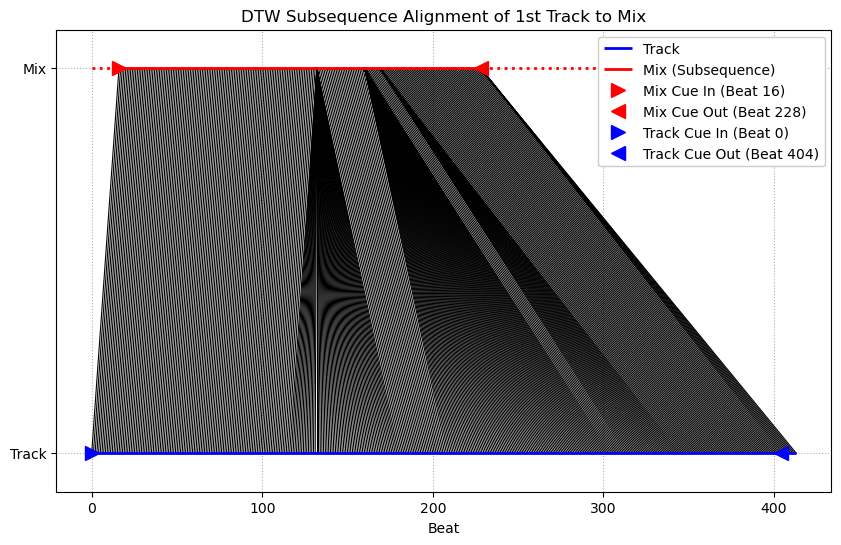

In [ ]:
plot_warp_path_connections(df_chroma_mfcc_sc)

In [ ]:
df_chroma_mfcc_sc.iloc[0]['wp']

array([[411, 222],
       [410, 222],
       [409, 222],
       [408, 222],
       [407, 222],
       [406, 221],
       [405, 221],
       [404, 221],
       [403, 221],
       [402, 221],
       [401, 221],
       [400, 221],
       [399, 221],
       [398, 220],
       [397, 219],
       [396, 219],
       [395, 218],
       [394, 218],
       [393, 217],
       [392, 216],
       [391, 215],
       [390, 214],
       [389, 213],
       [388, 212],
       [387, 211],
       [386, 210],
       [385, 209],
       [384, 208],
       [383, 207],
       [382, 206],
       [381, 205],
       [380, 204],
       [379, 203],
       [378, 202],
       [377, 201],
       [376, 200],
       [375, 199],
       [374, 198],
       [373, 197],
       [372, 196],
       [371, 195],
       [370, 194],
       [369, 193],
       [368, 192],
       [367, 192],
       [366, 192],
       [365, 192],
       [364, 192],
       [363, 192],
       [362, 192],
       [361, 192],
       [360, 192],
       [359,